In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.DataFrame([[8,8,4] , [7,9,5] , [6,10,6] , [5,12,7]] , columns =['cgpa' , 'profile_score' , 'lpa'])

In [ ]:
df

,cgpa,profile_score,lpa
0,8,8,4
1,7,9,5
2,6,10,6
3,5,12,7


In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()

model.add(Dense(2,activation = 'linear' , input_dim = 2))
model.add(Dense(1,activation = 'linear'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.get_weights()

[array([[-0.78900266, -0.24733382],
        [-1.0561596 ,  0.7185738 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.27334964],
        [0.28348005]], dtype=float32),
 array([0.], dtype=float32)]

In [ ]:
new_weights = [np.array([[0.1 , 0.1] , [0.1 , 0.1]] , dtype = np.float32) , np.array([0.,0.] , dtype = np.float32) , np.array([[0.1] , [0.1]] , dtype = np.float32) , np.array([0.] , dtype = np.float32)]

In [ ]:
model.set_weights(new_weights)

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate = 0.001)
model.compile(loss ='mean_squared_error' , optimizer = optimizer)

In [ ]:
history = model.fit(df.iloc[:,0:-1].values , df['lpa'].values , epochs = 75 , verbose = 1 , batch_size = 1)

Epoch 1/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4512 
Epoch 2/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0435 
Epoch 3/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1994 
Epoch 4/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1312 
Epoch 5/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.3698 
Epoch 6/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8672 
Epoch 7/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3403 
Epoch 8/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.3474 
Epoch 9/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.6698 
Epoch 10/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9723 
Epoch 11/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0827 
Epoch 12/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0469 
Epoch 13/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8376 
Epoch 14/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1914 
Epoch 15/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.1602 
Epoch 16/75
4/4 ━━━━━━━━━━━━━━━━━━

In [ ]:
model.get_weights()

[array([[0.36212158, 0.36212158],
        [0.41059762, 0.41059762]], dtype=float32),
 array([0.29409632, 0.29409632], dtype=float32),
 array([[0.39859003],
        [0.39859003]], dtype=float32),
 array([0.21698706], dtype=float32)]

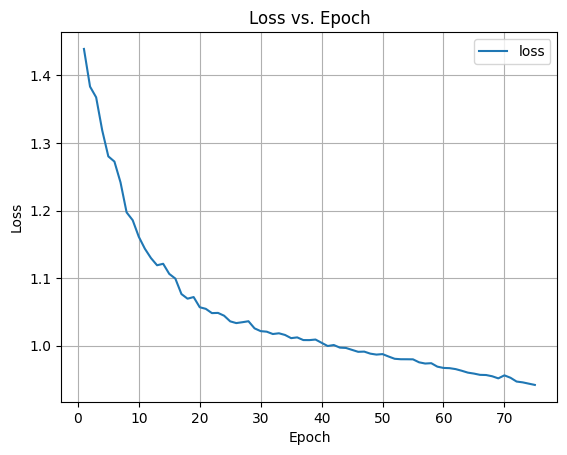

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1, 76) , history.history['loss'] , label = 'loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs. Epoch")
plt.grid(True)
plt.legend()
plt.show()